In [61]:
import numpy as np
import pandas as pd
import os

homedir = "/Users/zoliq/ownCloud/"
#homedir = "/Volumes/zoliq data/ownCloud/"
wd = homedir + "Jankoviny/Tick_transcriptome/klastrovani"
os.chdir(wd)

array = {}

with open("morpheus_kliste_stadia_filtered.gct") as f:
    c = 0
    for l in f:
        if c == 2:
            c += 1
            indices = l.strip().split("\t")[1:]
            indices = [x.replace(".RSEM","") for x in indices]
            print(indices)
        elif c < 5:
            c += 1
            print("ignored:" + l)
        else:
            data = l.strip().split("\t")
            array[data[0]] = [float(x) for x in data[1:]]
print("done")

ignored:#1.3

ignored:83534	5	6	2

['k_means_15', 'k_means_25', 'k_means_10', 'k_means_20', 'k_means_30', 'k_means_35', 'egg', 'larvae', 'female', 'fednymph', 'fedfemale']
ignored:k_means_2	na	na	na	na	na	na	1.00	1.00	1.00	2.00	2.00

ignored:k_means_3	na	na	na	na	na	na	1.00	1.00	1.00	2.00	3.00

done


In [62]:
df = pd.DataFrame(array, index=indices, dtype=np.float64)
X = df.T

In [63]:
print(X.loc[:,"egg":].head(10))

             egg  larvae  female  fednymph  fedfemale
c10097_g1   0.00    0.00    3.21      0.00       0.00
c10235_g1   0.00    2.03    0.00      0.00       0.53
c10265_g1   0.00    4.32    3.26      1.08       1.86
c10390_g1   0.00    0.00    0.00      0.36       2.00
c10395_g1   0.00    0.00    5.22      0.00       0.00
c10414_g1   1.13    0.13    0.55      0.00       0.00
c10450_g1   2.27    1.22    4.79      0.58       6.68
c10458_g1   0.49    3.68    2.66      0.49       1.02
c10507_g1  38.36   19.66   49.46     79.24      74.22
c10540_g1   1.45    0.22    0.25      0.00       0.28


In [64]:
# the following is for calculation of all variances

In [65]:
variance = np.var(X, axis=1) #0=x-axis, 1=y-axis
variance = np.var(X.loc[:,"egg":], axis=1) #limits calculation to columns defined after the comma

In [66]:
sortedvar = variance.sort_values(ascending=0, inplace=False)
topthousand = sortedvar.head(1000)
list(topthousand.index)[:10] #this is how you extract indices from a np.series

['c81210_g1',
 'c56425_g1',
 'c80070_g2',
 'c79647_g1',
 'c77449_g1',
 'c74700_g1',
 'c75020_g3',
 'c80070_g1',
 'c84113_g1',
 'c78072_g1']

In [67]:
with open("top1000.tsv","w") as out:
    out.write("contig\t{}\n".format("\t".join(indices)))
    for seq in list(topthousand.index):
        #print(seq, topthousand[seq]) #and this is how you extract the respective values
        data = [str(x).replace(".",",") for x in array[seq]]
        data = "\t".join(data)
        out.write("{}\t{}\n".format(seq, data))

In [86]:
#here I try plotting the top 1000 variable genes:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

homedir = "/Users/zoliq/ownCloud/"
#homedir = "/Volumes/zoliq data/ownCloud/"
wd = homedir + "Jankoviny/Tick_transcriptome/klastrovani"
os.chdir(wd)

array = {}

print("loading data...")
with open("trans.sample.gene-count_sorted.matrix.TMM.EXPR.txt") as f:
    c = 0
    for l in f:
        if c == 0:
            c += 1
            indices = l.strip().split("\t")
            indices = [x.replace(".RSEM","") for x in indices]
            print(indices)
        else:
            data = l.strip().split("\t")
            array[data[0]] = [float(x) for x in data[1:]]


print("computing variance for all contigs...")
df = pd.DataFrame(array, index=indices, dtype=np.float64)
X = df.T
variance = np.var(X, axis=1) 
sortedvar = variance.sort_values(ascending=0, inplace=False)
topthousand = sortedvar.head(1000)

print("filtering subarray of contigs with highest variance")
x = [1, 2, 3, 4, 5]
subarray = {k:array[k] for k in array.keys() if k in list(topthousand.index)}
y = pd.DataFrame(subarray, index=indices, dtype=np.float64)

loading data...
['egg', 'larvae', 'fednymph', 'female', 'fedfemale']
computing variance for all contigs...


plotting data


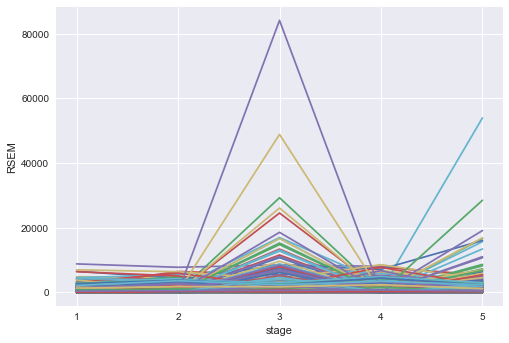

In [100]:
print("plotting data")
labels = indices
plt.style.context('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel="stage", ylabel="RSEM")
ax.set_xticks(x)
fig.savefig("variances.png")
plt.show()

In [ ]:
#this section is to calculate per-module sum-of-square/avg.silhouette

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Xsub = X.loc[:,"egg":]
n_modules = []
for kmean in indices[:indices.index("egg")]:
    maxmodules = int(kmean.split("_")[-1])
    #n_modules.append(maxmodules)
    print(kmean, maxmodules)
    cluster_labels_morpheus = np.array(X[kmean], dtype=np.int32)
    silhouette_avg = silhouette_score(Xsub, cluster_labels_morpheus)
    print("The average silhouette score is:", silhouette_avg)

k_means_15 15
The average silhouette score is: -0.4981674512978522
k_means_25 25
The average silhouette score is: -0.49586761358260295
k_means_10 10
The average silhouette score is: -0.4397832883015307
k_means_20 20
The average silhouette score is: -0.5054579678639485
k_means_30 30
The average silhouette score is: -0.5142205789721356
k_means_35 35
The average silhouette score is: -0.5290079648107022


In [ ]:
# this is to do the same with in-built K-means

In [35]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

Xsub = X.loc[:,"egg":]
n_modules = []
for maxmodules in range(2,15):
    kmeans = KMeans(n_clusters=maxmodules, random_state=10)
    cluster_labels = kmeans.fit_predict(Xsub)
    #spectral clustering takes a lot of time and produces an error: Graph is not fully connected!
    #spectral = SpectralClustering(n_clusters=maxmodules, random_state=10)
    #cluster_labels = spectral.fit_predict(Xsub)
    print("Calculating fit, n_clusters: {}".format(maxmodules))
    silhouette_avg = silhouette_score(Xsub, cluster_labels)
    
    #print("The average silhouette score for {} modules is {}:".format(maxmodules, silhouette_avg))
    print(kmeans.cluster_centers_)


Calculating fit, n_clusters: 2
[[1.87538991e+01 2.18952026e+01 2.94602982e+01 5.76648816e+01
  5.56271482e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.87030000e+02]]
Calculating fit, n_clusters: 3
[[1.70916781e+01 2.00091078e+01 2.70518768e+01 3.72705969e+01
  3.53495552e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.87030000e+02]
 [8.06646667e+02 9.15904167e+02 1.17105208e+03 9.72455583e+03
  9.66720625e+03]]
Calculating fit, n_clusters: 4
[[1.70944804e+01 2.00120213e+01 2.70558924e+01 3.46321725e+01
  3.71317646e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.87030000e+02]
 [5.48800000e+01 5.05650000e+01 2.55330000e+02 7.22695000e+02
  4.12179900e+04]
 [8.02169583e+02 9.11977083e+02 1.15012583e+03 1.09178304e+04
  5.39070083e+03]]
Calculating fit, n_clusters: 5
[[1.29627795e+01 1.41911047e+01 1.91888626e+01 2.77474287e+01
  2.61491026e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.8703000

In [7]:
maxmodules = 15
#this is for a single cluster analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
Xsub = X.loc[:,"egg":]
kmeans = KMeans(n_clusters=maxmodules, random_state=10)
cluster_labels = kmeans.fit_predict(Xsub)
#i would get the same using:
cluster_labels_morpheus = np.array(X.k_means_15, dtype=np.int32)
#silhouette_avg = silhouette_score(Xsub, cluster_labels_morpheus)
#print("The average silh score is:", silhouette_avg)

In [8]:
#this is memory-demanding but doable for 11000 contigs
silhouette_avg = silhouette_score(Xsub, cluster_labels_morpheus)
print("The average silh score is:", silhouette_avg)

The average silh score is: -0.4981674512978522


In [9]:
#compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(Xsub, cluster_labels_morpheus)

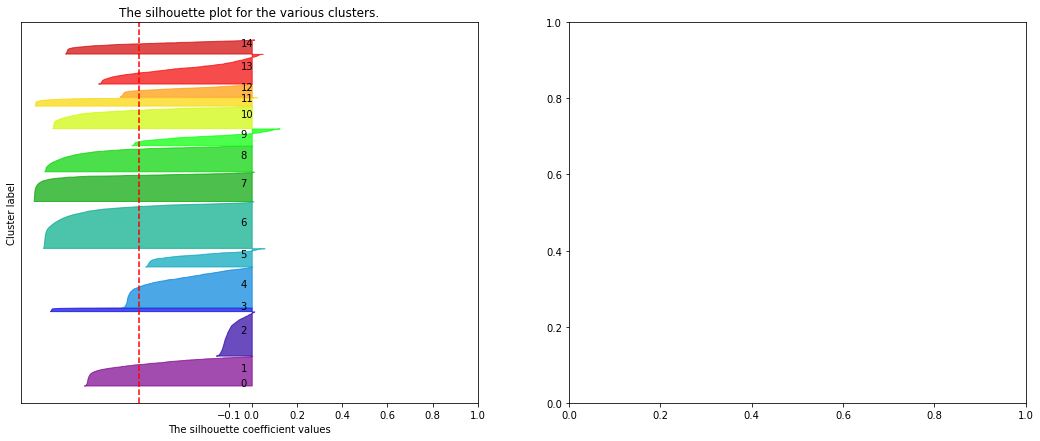

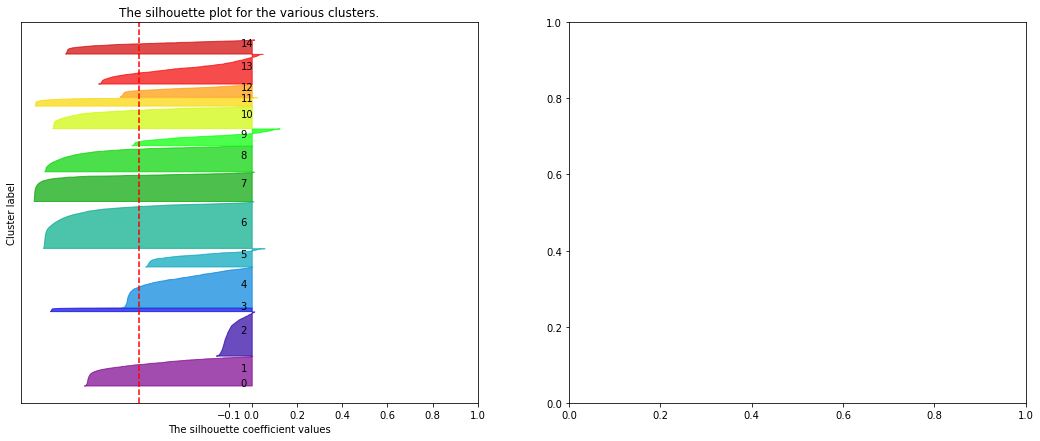

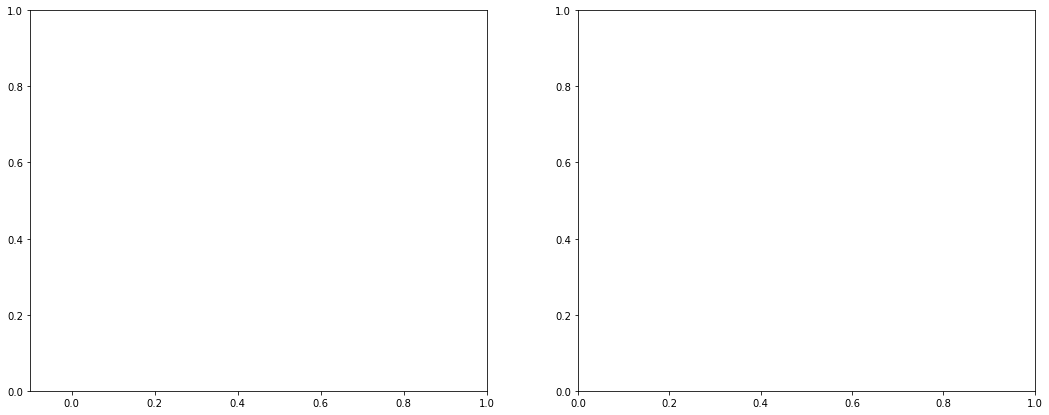

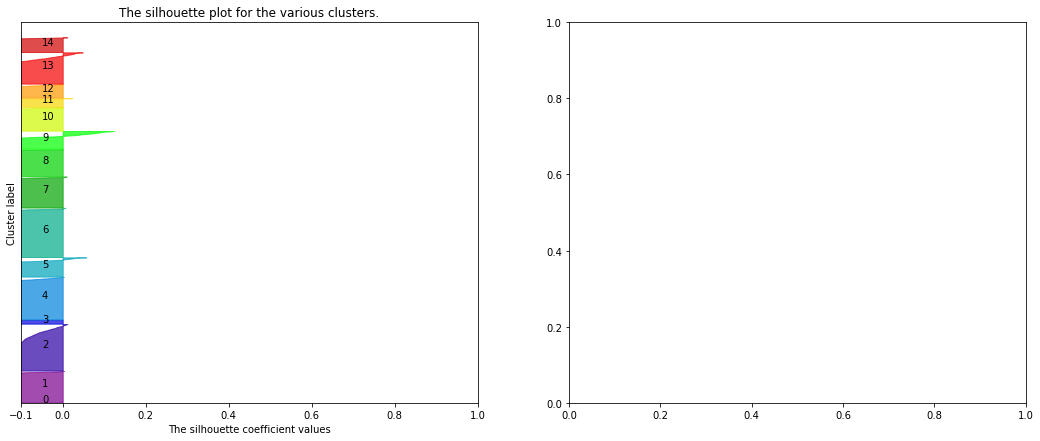

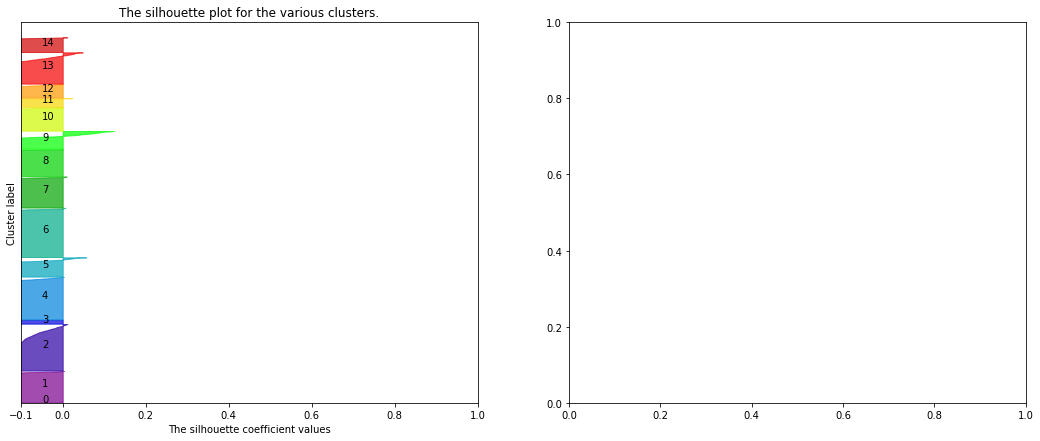

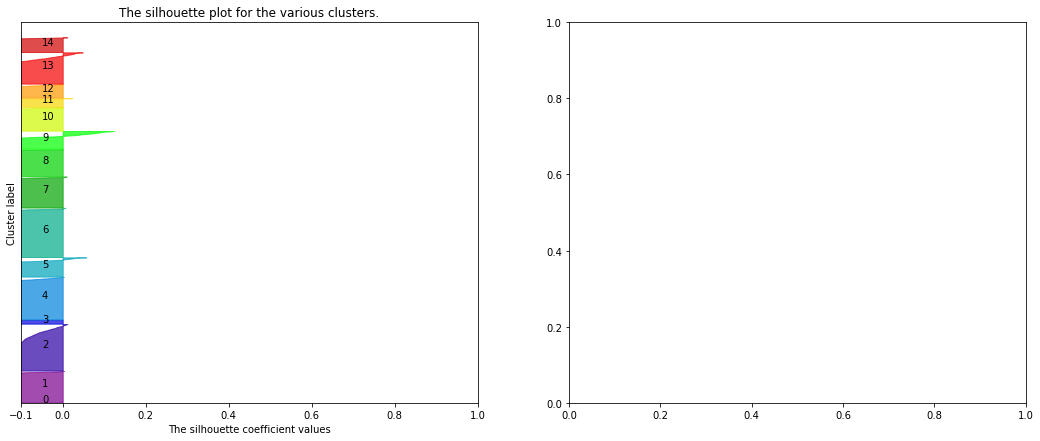

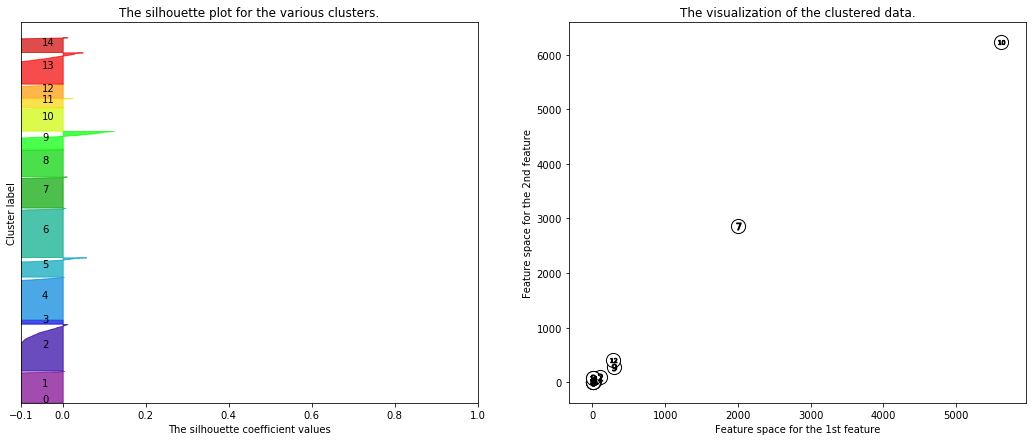

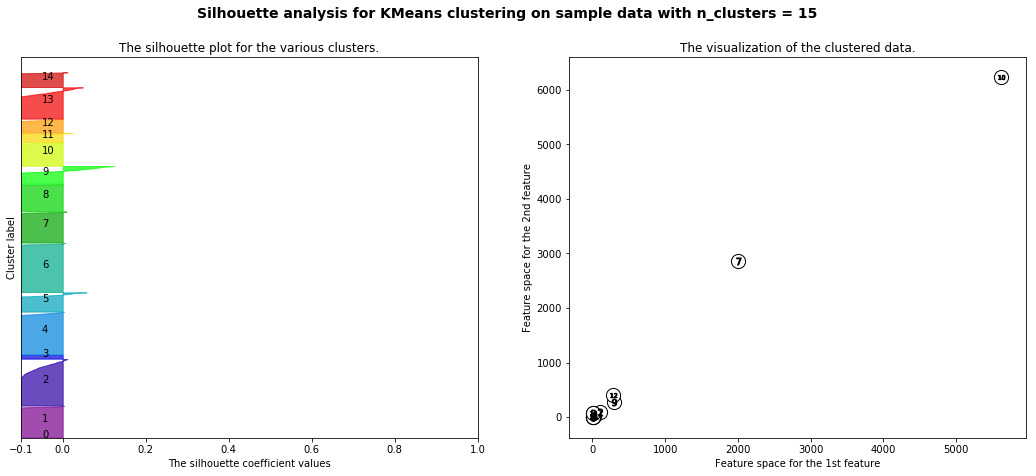

In [19]:
#this is to plot silhouette distributions for each module for n_clusters = 15
maxmodules = 15
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (maxmodules + 1) * 10])

y_lower = 10
for i in range(maxmodules):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels_morpheus == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / maxmodules)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / maxmodules)
#ax2.scatter(Xsub[:, 0], Xsub[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % maxmodules),
             fontsize=14, fontweight='bold')

plt.show()